# 課題5 ネットワーク分析

配点
- Q1.1 2P
- Q1.2 2P
- Q2.1 1P
- Q2.2 2.5P
- Q2.3 2.5P

In [1]:
# モジュールのインポート
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Q1
以下では、networkxモジュールに含まれるデータセット、空手クラブのソーシャルネットワーク、からグラフオブジェクトを作成し、ネットワーク全体を可視化しています。ネットワークは無方向で重みなしです。また自己ループやノード間の多重リンクはありません。

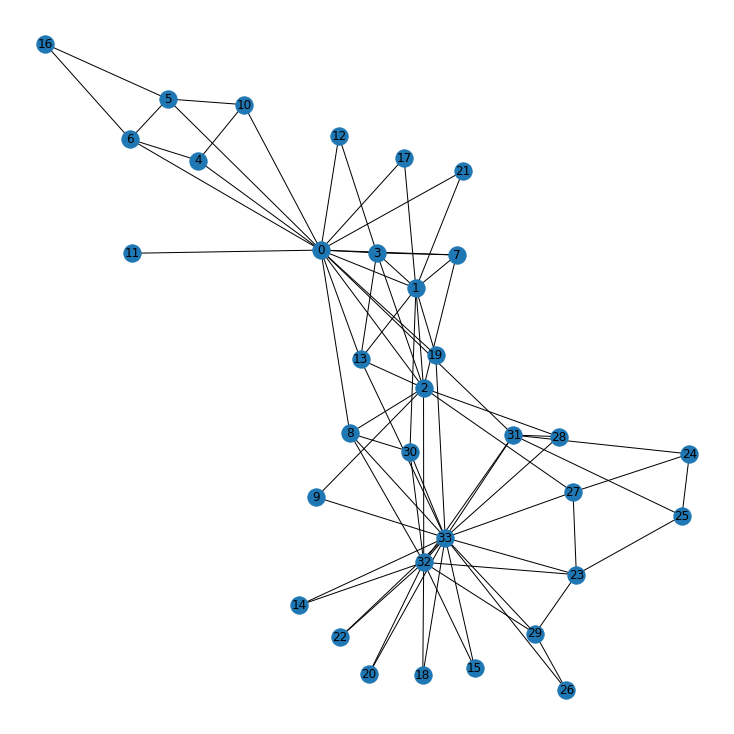

In [2]:
G = nx.karate_club_graph() # グラフの作成
pos = nx.spring_layout(G) # 可視化のレイアウト
plt.figure(figsize=(10,10)) # 可視化のサイズ
nx.draw(G, pos=pos, with_labels=True) # 可視化

このネットワークには34のノードと78のリンクが含まれ、各ノードには0から33の数字がふられています。以下ではこの数字をノードのラベルとして用います。

In [3]:
print(len(G)) # ノード数
print(G.size()) # リンク数

34
78


このネットワークの隣接行列`adj_matrix`は、以下の通りです。

In [4]:
adj_matrix=nx.adjacency_matrix(G).toarray() # 隣接行列の取得
for row in adj_matrix:
    print(row)

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
[1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0

### Q1.1
以下の辞書`adj_list`は、上記のネットワークのノードをキー、そのノードに隣接しているノードのリストを値として持つ辞書です。例えば、キーが31の値のリストを見ることで、ノード31には0, 24, 25, 28, 32, 33のノードが隣接していることがわかります。このような各ノードの隣接ノードリストの辞書を隣接リストと呼びます。

隣接行列`adj_matrix`を受け取り、隣接リストとなる辞書`adj_list`を作成して返す`get_adj_list()`関数を実装してください。

```Python
adj_list={0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31],
                1: [0, 2, 3, 7, 13, 17, 19, 21, 30],
                2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32],
                  ...
                31: [0, 24, 25, 28, 32, 33],
                32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33],
                33: [8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]}
```

In [5]:
def get_adj_list(adj_matrix):
    ### 引数：
    # adj_matrix : 隣接行列

    adj_list={} # 隣接リストの辞書
    for j in range(len(adj_matrix)): #行列を行ごとに分ける
        adj_list_list=[]
        for i in range(len(adj_matrix[j])): #行を要素ごとに処理
            if adj_matrix[j,i]==1:
                adj_list_list.append(i)
        adj_list[j]=adj_list_list
    ### 隣接リストの辞書を作成するコード ###
    
    return adj_list

`get_adj_list`関数が完成したら、以下のセルを実行して、`adj_list[0]`や`adj_list[33]`を表示し、上記に示されている各ノードの隣接ノードリストが作成できているか確認してください。

In [6]:
adj_list=get_adj_list(adj_matrix)

print(adj_list[0])
print(adj_list[33])

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
[8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]


### Q1.2
講義資料の幅優先探索のアルゴリズムを参考に、第1引数として隣接リスト、第2引数として始点ノードのラベルを受け取り、始点から各ノードへの距離の辞書`d`を返す以下の`bfs`関数を完成させてください。隣接リストは上記で作成した`adj_list`を用います。`d`は、キーがノードのラベル、値が始点からそのノードへの距離となる辞書です。

講義資料の`Q.enqueue`, `Q.dequeue`はそれぞれコード中の`Q.append`, `Q.popleft`に対応します。

<img src = '20191116115142.png' width=80%>

In [7]:
"""
#課題では両端キューを使っている、こっちは片方

visited[s]=True #始点ノードを訪問済みにする
d[s]=0 #始点ノード自身への距離は0
Q.append(s) #始点ノードをキューに入れる

while Q!=None: #キューが空でない限り繰り返し
    i=Q.popleft #キューからノードiを取り出し
    for j in adj_list[i]: #ノードiに隣接する各ノードjを取り出す
        if visited[j] == False: #ノードjがまだ未訪問であるという条件
            visited[j] = True #ノードjを訪問済みに更新する
            d[i]=d[j]+1 # 始点からノードjへの距離を(始点からノードiの距離+1)に更新する
            Q.append(j) #ノードjをキューに入れる
"""

'\n#課題では両端キューを使っている、こっちは片方\n\nvisited[s]=True #始点ノードを訪問済みにする\nd[s]=0 #始点ノード自身への距離は0\nQ.append(s) #始点ノードをキューに入れる\n\nwhile Q!=None: #キューが空でない限り繰り返し\n    i=Q.popleft #キューからノードiを取り出し\n    for j in adj_list[i]: #ノードiに隣接する各ノードjを取り出す\n        if visited[j] == False: #ノードjがまだ未訪問であるという条件\n            visited[j] = True #ノードjを訪問済みに更新する\n            d[i]=d[j]+1 # 始点からノードjへの距離を(始点からノードiの距離+1)に更新する\n            Q.append(j) #ノードjをキューに入れる\n'

In [8]:
a= [1, 3, 5, 7]
for b in a:
    print(b)

1
3
5
7


In [9]:
from collections import deque # キューのインポート

def bfs(g, s):
     ### 引数：
    # g: 隣接リスト
    # s: 始点ノードのラベル
    
    Q = deque() # キューの初期化
    visited={} # 訪問済みノード辞書
    d={} # 始点から各ノードへの距離の辞書
    for i in g.keys(): #ネットワークの各ノードiについて
        d[i]=np.inf # 距離の辞書を全て距離無限大に初期化
        visited[i]=False  #訪問済みノード辞書を全て未訪問（False）に初期化
        
    visited[s]=True #始点ノードを訪問済みにする
    d[s]=0 #始点ノード自身への距離は0
    Q.append(s) #始点ノードをキューに入れる

    while Q: #キューが空でない限り繰り返し
        i = Q.popleft() #キューからノードiを取り出し
        
        ### 以下の部分のコードを完成させてください ###
        
        for j in g[i]:### ノードiに隣接する各ノードjを取り出すコード ###
            if visited[j] == False: ### ノードjがまだ未訪問であるという条件コード ###              
                visited[j] = True### ノードjを訪問済みに更新するコード ###
                d[j]=d[i]+1### 始点からノードjへの距離を(始点からノードiの距離+1)に更新するコード ###
                Q.append(j)### ノードjをキューに入れるコード ###
                
        ### 作成するコードここまで ###
    return d # 始点から各ノードへの距離の辞書を返す

`bfs`関数が完成したら、以下のセルを実行して動作を確認してください。ノード0からノード26への長さは3、ノード11からノード26への長さは4となります。

In [10]:
d1=bfs(adj_list, 0)
print(d1[26])

d2=bfs(adj_list, 11)
print(d2[26])

3
4


## Q2
以下では、空手クラブのソーシャルネットワークデータについて各ノードの次数中心性を計算し、次数中心性の上位のノードを表示しています。ノード33が最も次数中心性が高いことがわかります。

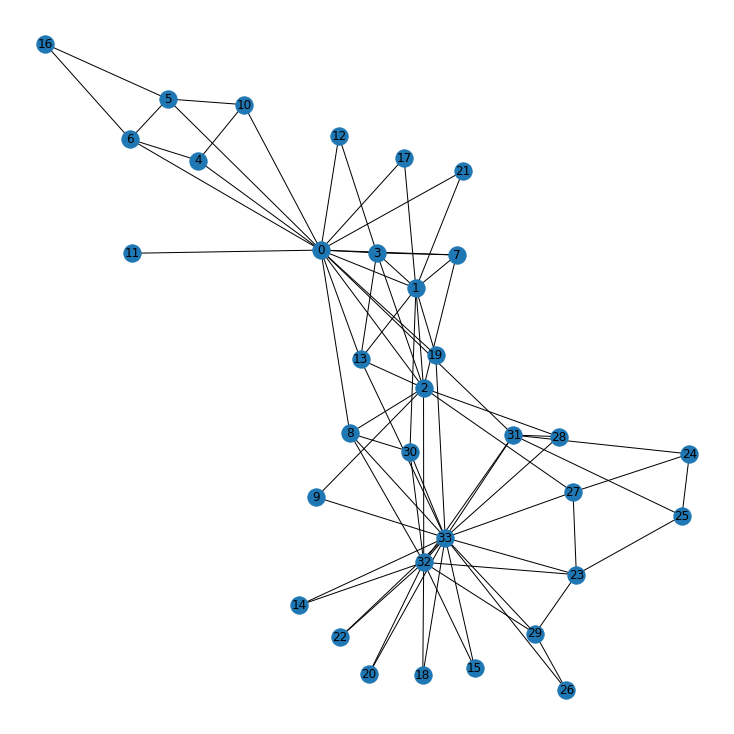

In [11]:
G = nx.karate_club_graph()
plt.figure(figsize=(10,10)) # 可視化のサイズ
nx.draw(G, pos=pos, with_labels=True) # 可視化

In [12]:
# 次数中心性 (次数/最大次数（N-1))
degree=nx.degree_centrality(G)
print(pd.Series(degree).sort_values(ascending=False).head(5)) 

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64


In [13]:
degree_centers = nx.degree_centrality(G)
print(pd.Series(degree_centers).sort_values(ascending=False).head(5))
#sorted(degree_centers.items(), key=lambda x: x[1], reverse=True)[:5]

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64


### Q2.1
近接中心性、媒介中心性、固有ベクトル中心性の各中心性について、上記の次数中心性と同様に各ノードの中心性を計算し、ネットワーク図の各ノードの位置を参照しながらそれぞれの中心性で上位のノードがどのような位置にあるか観察してください。

In [14]:
closeness = nx.degree_centrality(G)###  各ノードの近接中心性を計算 ###
print(pd.Series(closeness).sort_values(ascending=False).head(5))### 近接中心性上位のノードを表示 ###

betweenness = nx.betweenness_centrality(G)### 各ノードの媒介中心性を計算 ###
print(pd.Series(betweenness).sort_values(ascending=False).head(5))### 媒介中心性上位のノードを表示

eigenvector = nx.eigenvector_centrality_numpy(G)### 各ノードの固有ベクトル中心性を計算 ###
print(pd.Series(eigenvector).sort_values(ascending=False).head(5))### 固有ベクトル中心性上位のノードを表示 ###

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64
0     0.437635
33    0.304075
32    0.145247
2     0.143657
31    0.138276
dtype: float64
33    0.373363
0     0.355491
2     0.317193
32    0.308644
1     0.265960
dtype: float64


In [15]:
a = [[1, 3, 4, 5],
    [3, 5, 2, 3],
    [5, 6, 7, 1]]

print(a[0])
print(a[0][2])
print([row[0] for row in a])
print(np.shape(a))
print(np.shape(a)[0]) #3行
print(np.shape(a)[1]) #4列

A = np.array([[1, 2],
              [3, 4],
              [5, 6]])

print(A.shape)
print( A.shape[0])
print(A.shape[1])

l = [1, 3, 5]
l.append(100)
print(l)

[1, 3, 4, 5]
4
[1, 3, 5]
(3, 4)
3
4
(3, 2)
3
2
[1, 3, 5, 100]


### Q2.2
以下では各ノードのPageRankを計算する関数を実装します。`pagerank_centrality`関数は、第1引数としてネットワークの隣接行列、第2引数としてダンピング係数（通常移動とテレポート移動の割合を指定）、第3引数としてベキ乗法の繰り返し回数を受け取り、各ノードのPageRankを要素とするベクトルを返します。ベクトルの各要素のインデックスはノードのラベルに対応します。

PageRankを更新するための行列$B$はダンピング係数を$\alpha$、推移確率行列を$A$として以下のように定義されます。行列$A$はネットワークの隣接行列について、すべての要素が0の列があればその列のすべての要素を1とした上で、隣接行列の各要素についてその列の和で割ったものです。

$B=\alpha A+\frac{1-\alpha}{ノード数}$

行列$B$を用いてPageRankのベクトル$x=(x_1,x_2,...,x_n)$は以下のように更新されます。

$x=Bx$

$x=x/\Sigma_{i=1}^n x_i$

xはshapeが(ノード数,)の1次元ベクトルです。
xを(ノード数,1)の列ベクトルとして処理した方は、xをflatten()したものを返すか、そもそものxをnp.ones(ノード数)で初期化して処理してください。

In [16]:
def pagerank_centrality(adj_matrix, alpha=0.85, t=100):
    #ネットワークの隣接行列、ダンピング係数（通常移動とテレポート移動の割合を指定）、ベキ乗法の繰り返し回数
    ### 引数：
    # adj_matrix: 隣接行列
    # alpha: ダンピング係数（通常移動とテレポート移動の比率を指定）
    # t: ベキ乗法の繰り返し回数
    
    # 推移確率行列Aを作成
    #adj_matrix[:, adj_matrix.sum(0)==0]=1 # 出次数が0のノードは隣接行列の対応する列を1で埋める
    
    N = adj_matrix.shape[0]
    A = adj_matrix.copy()
    A[:, adj_matrix.sum(axis=0)==0]=1 # 出次数が0のノードは隣接行列の対応する列を1で埋める
    
    A = A / A.sum(axis=0, keepdims=True)
       
# 隣接行列の要素をその列の和（その列に対応するノードの出次数）で割る
   
###  行列B（講義資料参照）を作成するコード　###
    B = alpha*A + (1-alpha)/N###  行列B（講義資料参照）を作成するコード　###
    x = np.ones(N)/N ### 各ノードのPageRankを要素とするベクトルを初期化するコード。各要素の値は(1/ノード数） ###
    
    for _ in range(t):
        ### t回以下の計算を繰り返すコード ###
        x = np.dot(B, x)### 1. x=(Bとxの内積)
        ### 2.　xのすべての要素の和でxの各要素を割る
        x = x / sum(x)
    return x

`pagerank_centrality`関数が完成したら、以下のセルを実行して動作を確認してください。最もPageRankが高いノードは33でそのPageRankは$\simeq0.10$、次にPageRankが高いノードは0でそのPageRankは$\simeq0.09$となります。

In [17]:
adj_matrix=nx.adjacency_matrix(G).toarray()
pagerank=pagerank_centrality(adj_matrix, 0.85, 100)
# print(pagerank)
print(pd.Series(pagerank).sort_values(ascending=False).head(5))

33    0.100919
0     0.096997
32    0.071693
2     0.057079
1     0.052877
dtype: float64


NetworkXの`pagerank`関数を使って各ノードのPageRankを計算すると以下のようになります。

In [18]:
pr=nx.pagerank(G, alpha=0.85, max_iter=100)
print(pd.Series(pr).sort_values(ascending=False).head(5))

33    0.100918
0     0.097002
32    0.071692
2     0.057078
1     0.052878
dtype: float64


## Q3
以下では、空手クラブのソーシャルネットワークデータを用いてコミュニティ抽出を行います。まず、コミュニティ抽出前のネットワークを可視化します。

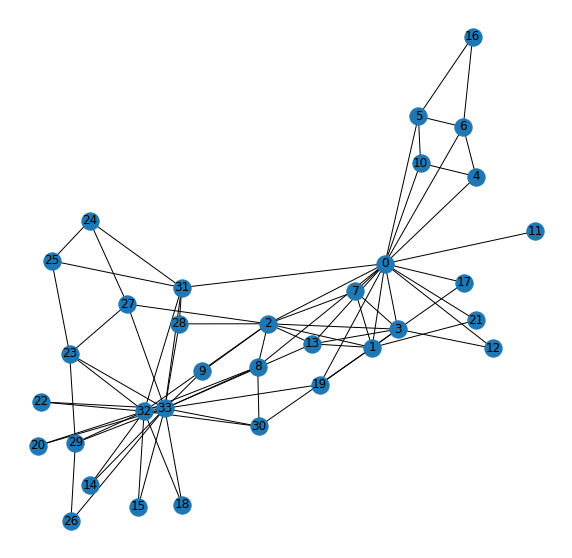

In [19]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos)
_ = plt.axis('off')

エッジ媒介中心性を用いたコミュニティ抽出（Girvan-Newman法）を行う以下の`girvan_newman`関数を完成させてください。`girvan_newman`関数は引数としてnetworkxのグラフオブジェクトを受け取り、各コミュニティのノード集合を要素としたリストを返します。

In [20]:
def find_best_edge(G): # グラフGにおいてエッジ媒介中心性が一番大きいエッジの両端ノードをタプルとして返す関数
    edge_between = nx.edge_betweenness_centrality(G)     
    return max(edge_between, key=edge_between.get)

def girvan_newman(G):
    G = G.copy() # グラフGのエッジを除いていくのでグラフオブジェクトをコピーしておく
    removed_edges=[] # 取り除いたエッジのリスト
    while nx.number_connected_components(G) ==1: # グラフが分割されるまで繰り返す
        
        ### エッジ媒介中心性が一番大きいエッジをGから取り除く以下の処理を完成させてください ###
        
        ### 1. エッジ媒介中心性が一番大きいエッジの両端ノードを探す
        v1, v2 = find_best_edge(G)
        ### 2. そのエッジをGから取り除く（ヒント グラフオブジェクトのremove_edgeメソッド）
        G.remove_edge(v1, v2)
        ### 3. 削除したエッジの両端ノードをタプルとしてremoved_edgesに追加
        removed_edges.append((v1,v2))
        
        ### 作成するコードここまで ###

    return list(nx.connected_components(G)), removed_edges

`girvan_newman`関数が完成したら、以下のセルを実行して動作を確認してください。取り除かれるエッジのリスト`removed_edges`は以下になります。

```Python
 [(0, 31), (0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]
 ```

In [21]:
communities, removed_edges = girvan_newman(G)
print(removed_edges)

[(0, 31), (0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]


以下のセルを実行してネットワークを可視化し、先の処理で抽出されたコミュニティを確認してください。取り除かれたエッジは破線で示されています。

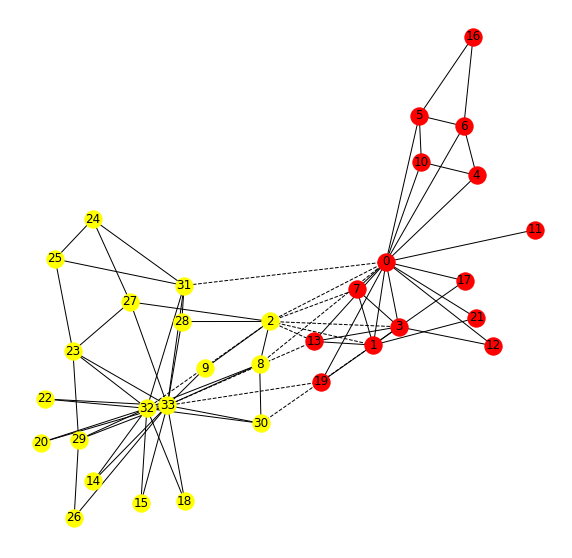

In [22]:
keeped_edges = set(G.edges()) - set(removed_edges)
colors = ['red', 'yellow']

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(G, pos, edgelist=keeped_edges)
nx.draw_networkx_edges(G, pos, edgelist=removed_edges, style='dashed')
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=community, node_color=color)
nx.draw_networkx_labels(G, pos=pos)
_ = plt.axis('off')

### 参考

In [23]:
# networkx(バージョン2.X以上)のGirvan–Newman法の関数によるコミュニティ抽出
community_generator = nx.community.girvan_newman(G)

# community_generatorはジェネレーターとなっており、for文を繰り返すごとにコミュニティ分割を行う
# 最終的には各ノードが1つのコミュニティの状態となる
for communities in community_generator: 
    print(communities)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25